In [1]:
import common
import importlib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import socket

# Show all columns and rows in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

base_path = "/home/per/workspace/sortledton/src/figures/"

## Analytics

In [2]:
# graphalytics inserts
sortledton_block_sizeonly = "num_threads_read == 0 and (hostname == 'scyper21' or hostname == 'scyper22') and library == 'sortledton.3' or library == 'sorted_vector_al.6' and graph in ('graph500-22', 'graph500-24', 'graph500-26', 'uniform-24')"


data = common.import_gfe("view_graphalytics_inserts").query(sortledton_block_sizeonly).copy() # data from the experiments
data["build_frequency"].fillna(pd.Timedelta(0), inplace=True) # replace NaT with 0, otherwise the records are ignored in the group by

data = data.groupby(["library", "graph", "block_size", "algorithm"]) \
    .agg(completion_time=("median_secs", "median"), count=("median_secs", "count"))
data = data.unstack("algorithm")[("completion_time")]
data

algorithm                                          bfs        cdlp  \
library            graph          block_size                         
sorted_vector_al.6 graph500-24    1024        0.169685   16.213700   
                   uniform-24     1024        0.163313   39.476652   
sortledton.3       com-friendster 512         5.027893  238.939591   
                   dota-league    512         0.001097    1.219088   
                   graph500-22    512         0.045300    7.430630   
                   graph500-24    16          0.165297   31.975175   
                                  32          0.158436   23.623083   
                                  64          0.157659   21.913115   
                                  128         0.157581   22.783623   
                                  256         0.156484   23.093207   
                                  512         0.157272   23.896987   
                                  1024        0.157453   32.824404   
                                  2048        0.153184   31.337447   
                   graph500-26    512         0.601730  133.241503   
                   uniform-24     512         0.170649   35.626129   
                   uniform-26     512         0.634064  178.967329   

algorithm                                            lcc   pagerank  \
library            graph          block_size                          
sorted_vector_al.6 graph500-24    1024         41.796077   2.125752   
                   uniform-24     1024          3.412015   3.969665   
sortledton.3       com-friendster 512          63.483339  34.751672   
                   dota-league    512          49.638318   0.128635   
                   graph500-22    512           8.368674   0.450562   
                   graph500-24    16          185.775184   4.925753   
                                  32          111.866535   3.559308   
                                  64           77.417981   2.820035   
                                  128          64.812515   2.476586   
                                  256          55.991248   2.299985   
                                  512          47.386676   2.230841   
                                  1024         44.241582   2.201741   
                                  2048         43.026160   2.190112   
                   graph500-26    512         278.601516  11.863777   
                   uniform-24     512           3.752576   4.015327   
                   uniform-26     512          15.940698  20.745641   

algorithm                                          sssp        wcc  
library            graph          block_size                        
sorted_vector_al.6 graph500-24    1024         3.786768   0.636032  
                   uniform-24     1024         8.901694   1.090635  
sortledton.3       com-friendster 512         50.344591  17.152766  
                   dota-league    512          0.274610   0.027313  
                   graph500-22    512          0.836904   0.140162  
                   graph500-24    16           8.091575   1.526682  
                                  32           6.010531   1.102882  
                                  64           5.131479   0.813570  
                                  128          4.268784   0.688123  
                                  256          3.951504   0.658264  
                                  512          3.835369   0.623331  
                                  1024         3.824666   0.627702  
                                  2048         3.715067   0.626452  
                   graph500-26    512         24.081992   3.098358  
                   uniform-24     512          8.175456   1.049245  
                   uniform-26     512         43.973580   6.888502

In [3]:
normalized = data.loc["sortledton.3", "graph500-24", slice(None)] / data.loc["sorted_vector_al.6", "graph500-24", 1024]
normalized

algorithm                                 bfs      cdlp       lcc  pagerank  \
library      graph       block_size                                           
sortledton.3 graph500-24 16          0.974143  1.972108  4.444800  2.317182   
                         32          0.933707  1.456983  2.676484  1.674376   
                         64          0.929128  1.351518  1.852279  1.326606   
                         128         0.928668  1.405208  1.550684  1.165040   
                         256         0.922203  1.424302  1.339629  1.081963   
                         512         0.926847  1.473876  1.133759  1.049436   
                         1024        0.927913  2.024486  1.058510  1.035747   
                         2048        0.902755  1.932776  1.029431  1.030276   

algorithm                                sssp       wcc  
library      graph       block_size                      
sortledton.3 graph500-24 16          2.136802  2.400322  
                         32          1.587246  1.734004  
                         64          1.355108  1.279134  
                         128         1.127290  1.081900  
                         256         1.043503  1.034954  
                         512         1.012834  0.980031  
                         1024        1.010008  0.986903  
                         2048        0.981065  0.984938

In [4]:
normalized.sort_values(axis=1, by='algorithm')

algorithm                                 bfs      cdlp       lcc  pagerank  \
library      graph       block_size                                           
sortledton.3 graph500-24 16          0.974143  1.972108  4.444800  2.317182   
                         32          0.933707  1.456983  2.676484  1.674376   
                         64          0.929128  1.351518  1.852279  1.326606   
                         128         0.928668  1.405208  1.550684  1.165040   
                         256         0.922203  1.424302  1.339629  1.081963   
                         512         0.926847  1.473876  1.133759  1.049436   
                         1024        0.927913  2.024486  1.058510  1.035747   
                         2048        0.902755  1.932776  1.029431  1.030276   

algorithm                                sssp       wcc  
library      graph       block_size                      
sortledton.3 graph500-24 16          2.136802  2.400322  
                         32          1.587246  1.734004  
                         64          1.355108  1.279134  
                         128         1.127290  1.081900  
                         256         1.043503  1.034954  
                         512         1.012834  0.980031  
                         1024        1.010008  0.986903  
                         2048        0.981065  0.984938

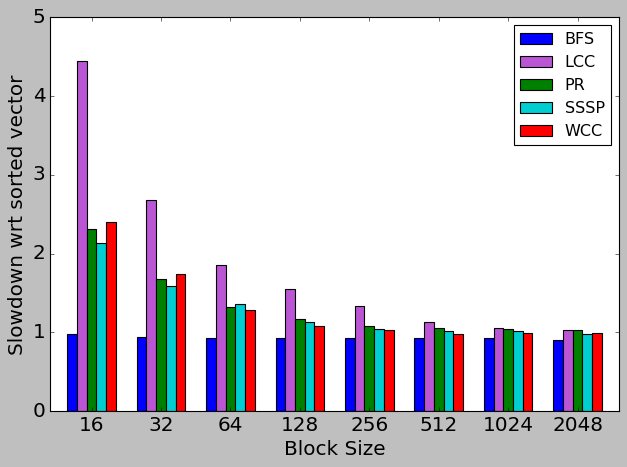

In [17]:
## FIGURE 2b AND FIGURE 6a 

import numpy as np

import matplotlib.style
matplotlib.style.use('classic')

visualize = normalized
visualize = visualize.droplevel("library")
visualize = visualize.droplevel("graph")
visualize = visualize.drop("cdlp", axis=1)

colormap=common.set_algorithm_colormap()
visualize.plot.bar(width=0.7, color=colormap)
plt.xlabel("Block Size", fontsize=18)
plt.ylabel("Slowdown wrt sorted vector", fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(np.arange(0, 6, 1), fontsize=18)

legend_labels = ["BFS", "LCC", "PR", "SSSP", "WCC"]
plt.legend(loc='upper right', fontsize = 'large', labels=legend_labels)

plt.tight_layout()
plt.savefig("../plots/block-sizes-analytics-new.png", dpi=400)

In [6]:
#normalized = data.loc["uniform-24"] / data.loc["uniform-24", 256]


#visualize = normalized
#visualize.plot.bar()

#### Observation

There is no trend that indicates block sizes between 256 and 1024 have major influence on the performance of analytical algorithms.

Below 256 multiple analytical algoritms loose performance. 

## Inserts

In [7]:
sortledton_block_sizeonly = "(hostname == 'scyper21' or hostname == 'scyper22') and library == 'sortledton.3' and graph in ('graph500-22', 'graph500-24', 'graph500-26', 'uniform-24') and block_size != -1"

edges_per_graph = pd.DataFrame({
    "graph": ["friendster", "dota-league", "graph500-22", 
              "graph500-24", "graph500-26", "uniform-22", 
              "uniform-24", "uniform-26"
              ],
    "edges": [1806067135, 50870313, 64155735, 260379520, 1051922853, 64155735, 260379520, 1051922853]
})

data = common.import_gfe("View_Inserts").query(sortledton_block_sizeonly).copy() # data from the experiments
data["build_frequency"].fillna(pd.Timedelta(0), inplace=True) # replace NaT with 0, otherwise the records are ignored in the group by
data = data.merge(edges_per_graph, on="graph")
data["edges_per_second"] = data["edges"] / data["completion_time_secs"]

data_grouped = data.groupby(["graph", "block_size"]) \
    .agg(edges_per_second=("edges_per_second", "median"), count=("edges_per_second", "count"))
#data = data.unstack("algorithm")[("completion_time")]
data_grouped

edges_per_second  count
graph       block_size                         
graph500-22 512             4.126019e+06      2
graph500-24 16              1.663785e+06      6
            32              3.561707e+06      6
            64              4.231400e+06      6
            128             4.352898e+06      5
            256             4.268190e+06      5
            512             3.836104e+06      7
            1024            3.175241e+06      5
            2048            2.245332e+06      5
graph500-26 512             3.586790e+06      2
uniform-24  512             4.737711e+06      3

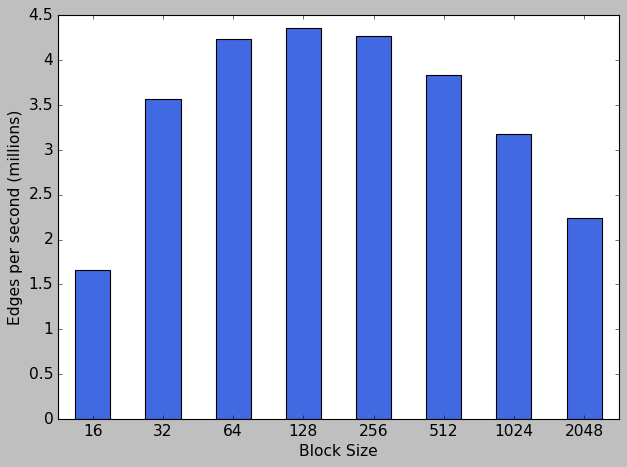

In [16]:
## FIGURE 6b

visualize = data_grouped.loc["graph500-24"].copy()
visualize = visualize.drop("count", axis=1)

import matplotlib.style
matplotlib.style.use('classic')

import matplotlib.ticker as ticker
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))

p = visualize.plot.bar(color='royalblue')
plt.xlabel("Block Size", fontsize=14)
plt.ylabel("Edges per second (millions)", fontsize=14)
plt.xticks(rotation=0, fontsize=14)
p.yaxis.set_major_formatter(ticks_y)
plt.yticks(fontsize=14)
p.get_legend().remove()

plt.tight_layout()
plt.savefig("../plots/block-sizes-insertions-new.png", dpi=400)


(array([0]), [Text(0, 0, '512')])

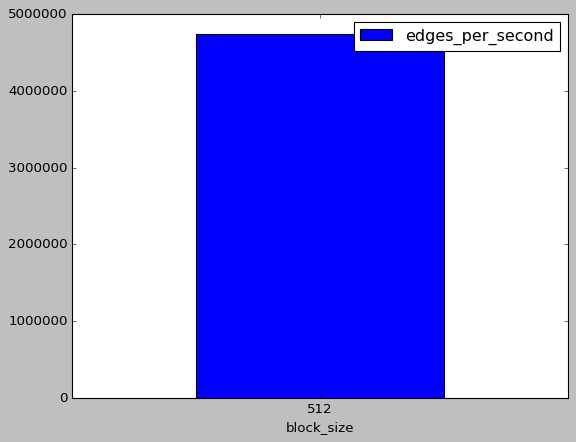

In [9]:
visualize = data_grouped.loc["uniform-24"].copy()
visualize = visualize.drop("count", axis=1)
p = visualize.plot.bar()
plt.xticks(rotation=0)

#### Observation

For uniform graphs the block size has no influence on the insertions performance. 
For power-law graphs we see that blocks of sizes of 128 or 256 are best.

#### Explanation

For uniform graphs we do not see the use of many/any blocks because the adjacency set sizes are mostly below.
For power-law graphs small block sizes are better because either finding the correct block is cheaper if performed with skip-list jumps than binary search or/xor there is less data to move, e.g. in the GC.
For too small block sizes we see more random jumps to check the skip list and more memory allocation overhead.

## Result

We run a wider range of block size parameters to
  (1) find the limit when it influences analytical performance.
  (2) find the best block size for insertions

There is no need to run with blocks bigger than 1024 because we do expect insertion performance to decrease without winning analytical performance.
  
We start with the parameters: 8, 32, 64 and 128 on the same graphs.

We find that 512 is the best block size because it is safe to state that analytical algorithms do not suffer and we see good insertion performance.

## Open Question

What happens to the storage size of the data structure?
 We already observed that a block size of 32 cannot be loaded into memory for graph500-26.
What about LCC?